## 필수 라이브러리 및 data load

In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, f1_score,
    precision_score, recall_score
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
import category_encoders as ce

In [2]:
train_data = pd.read_csv(r"C:\Users\njh45\OneDrive\바탕 화면\Kuggle_11기\Project\train.csv")
test_data = pd.read_csv(r"C:\Users\njh45\OneDrive\바탕 화면\Kuggle_11기\Project\test.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(3116945, 22)
(2077964, 21)


In [4]:
# 'class' 컬럼에서 'e'와 'p'의 개수 세기
class_counts = train_data['class'].value_counts()
print(class_counts)

class
p    1705396
e    1411549
Name: count, dtype: int64


## 결측치 50% 이상 제거 / 중복행 제거 / 레이블 인코딩

In [3]:
# 결측값 50% 이상 및 id 컬럼 제거
columns_to_drop = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color', 'id']

# train_data에서 해당 컬럼 삭제
train_data = train_data.drop(columns=columns_to_drop)

print(train_data.shape)

(3116945, 16)


In [ ]:
label_encoder = LabelEncoder()S

# 'class'와 'season' 컬럼에 레이블 인코딩 적용
train_data['class'] = train_data['class'].apply(lambda x: 0 if x == 'e' else 1)
train_data['season'] = label_encoder.fit_transform(train_data['season'])

# 결과 확인
print(train_data[['class', 'season']].head())

   class  season
0      0       0
1      1       3
2      0       3
3      0       2
4      0       0


In [5]:
train_data.drop_duplicates(inplace=True)
print(train_data.duplicated().sum())

0


## data information

In [7]:
display(train_data.head(20))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,0
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,3
2,0,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,3
3,0,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,2
4,0,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,0
5,1,4.30,x,t,n,f,s,c,n,5.91,8.20,w,t,z,d,0
6,0,9.65,p,y,w,f,e,c,k,19.07,12.69,w,t,e,g,3
7,1,4.55,x,e,e,f,a,NaN,y,8.31,9.77,y,t,z,d,0
8,1,7.36,f,h,e,f,x,d,w,5.77,17.13,w,f,f,d,0
9,0,6.45,x,t,n,f,a,d,w,7.13,12.77,e,f,f,d,0


In [ ]:
# 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color' 제거 후

'''
id = 버섯 식별 번호
class = target 컬럼

cap-diameter = 버섯 모자 지름_동적
cap-shape = 버섯 모자 모양
cap-surface = 버섯 모자 표면 질감
cap-color = 버섯 모자 색상

does-bruise-or-bleed = 버섯에 멍이 있거나 즙이 나는지 여부. 특정 버섯은 상처가 나면 색이 변할수도

gill-attachment = 버섯 자루의 주름(?)
gill-spacing = 버섯 주름의 간격_동적
gill-color = 버섯 자루의 색상

stem-height = 버섯 자루 높이_동적
stem-width = 버섯 자루 너비_동적
stem-color = 버섯 자루 색상

has-ring = 버섯 자루에 고리 유무
ring-type = 고리의 유형

habitat = 버섯 거주지
season = 버섯이 자라는 계절
'''

In [ ]:
# 타입
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                int32  
dtypes: float64(3), int32(1), int64(1), object(11)
memory usage: 368.6+ MB


In [ ]:
# 고유값
unique_counts = train_data.nunique()
print(unique_counts)

# label encoding = 'class' 'season'
# binary encoding 고려해보자
# 정규화/표준화_float type이니까 = 'cap-diameter', 'stem-height', 'stem-width'

class                      2
cap-diameter            3913
cap-shape                 74
cap-surface               83
cap-color                 78
does-bruise-or-bleed      26
gill-attachment           78
gill-spacing              48
gill-color                63
stem-height             2749
stem-width              5836
stem-color                59
has-ring                  23
ring-type                 40
habitat                   52
season                     4
dtype: int64


In [ ]:
# null 값
null_columns = train_data.isnull().sum()
ㄴ
# null 값이 있는 컬럼만 필터링
null_columns_with_data = null_columns[null_columns > 0] 

# null 값이 있는 컬럼과 해당 null 값의 개수를 출력
print("Null 값이 있는 컬럼과 그 개수:")
print(null_columns_with_data)

# null 값이 있는 컬럼의 수를 출력
print(f"\nNull 값이 있는 컬럼의 수: {len(null_columns_with_data)}")

Null 값이 있는 컬럼과 그 개수:
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
dtype: int64

Null 값이 있는 컬럼의 수: 12


## 결측치 대체

### float type

In [7]:
# 각 컬럼의 skewness(왜도) 계산
skewness_values = train_data[['cap-diameter', 'stem-height', 'stem-width']].skew()
print(skewness_values)

cap-diameter    3.972609
stem-height     1.926682
stem-width      1.235427
dtype: float64


In [6]:
# skewness > 0.5 이므로 'cap-diameter' 컬럼의 결측치를 중앙값 대체
median_value = train_data['cap-diameter'].median()
train_data['cap-diameter'].fillna(median_value, inplace=True)

C:\Users\njh45\AppData\Local\Temp\ipykernel_36148\600026456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['cap-diameter'].fillna(median_value, inplace=True)


### object type

In [8]:
# 빈 데이터프레임 생성
cumulative_95_to_100_percent_rows = pd.DataFrame()

# 대상이 되는 모든 컬럼에 대해 처리
for column in train_data.columns:
    if column != 'class':  # 'class' 컬럼은 제외
        # 각 컬럼의 고유값별 빈도를 계산
        value_counts = train_data[column].value_counts(normalize=True)
        
        # 누적 백분율을 계산
        cumulative_percent = value_counts.cumsum()
        
        # 누적 백분율 0% ~ 1% 구간에 해당하는 고유값 필터링
        valid_values = cumulative_percent[(cumulative_percent <= 0.01)].index

        # 해당 고유값들을 가진 행들을 필터링하여 추가
        cumulative_95_to_100_percent_rows = pd.concat([cumulative_95_to_100_percent_rows, train_data[train_data[column].isin(valid_values)]], axis=0)

# 중복된 행 제거
cumulative_95_to_100_percent_rows.drop_duplicates(inplace=True)

# class 컬럼에서 0과 1의 개수를 계산
class_counts = cumulative_95_to_100_percent_rows['class'].value_counts()

# 결과 출력
print(class_counts)

## 누적 백분율 1%중에 class 약 3%정도 차지하니까 'Unknown' 묶어보자

class
1    55036
0    27315
Name: count, dtype: int64


In [7]:
# 범주형 변수들 중에서 고유값의 하위 1%를 'Unknown'으로 변환하는 함수
def replace_infrequent_categories(df, column, threshold=0.01):
    # 각 고유값의 빈도 계산
    value_counts = df[column].value_counts(normalize=True)
    
    # 하위 1%에 해당하는 고유값 추출
    infrequent = value_counts[value_counts <= threshold].index
    
    # 해당 고유값들을 'Unknown'으로 대체
    df[column] = df[column].apply(lambda x: 'Unknown' if x in infrequent else x)
    
    return df

# train_data에서 object 타입의 모든 컬럼에 대해 Unknown 처리
for col in train_data.select_dtypes(include=['object']).columns:
    train_data = replace_infrequent_categories(train_data, col, threshold=0.05)

# 결과 확인
print(train_data.head())

   class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0      0          8.80         f           s   Unknown                    f   
1      1          4.51         x           h         o                    f   
2      0          6.94         f           s   Unknown                    f   
3      0          3.88         f           y         g                    f   
4      0          5.85         x     Unknown         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-color  \
0               a            c          w         4.51       15.39          w   
1               a            c          n         4.79        6.48    Unknown   
2               x            c          w         6.85        9.93          n   
3               s          NaN          g         4.16        6.53          w   
4               d          NaN          w         3.37        8.36          w   

  has-ring ring-type habitat  season  

In [8]:
# 'Unknown'이라는 문자열로 대체 후 원본 데이터 유지
object_columns = train_data.select_dtypes(include=['object']).columns

# 각 object 타입 컬럼의 결측값을 'Unknown'으로 대체
train_data[object_columns] = train_data[object_columns].fillna('Unknown')

# 결과 출력
print(train_data[object_columns].isnull().sum())

cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
dtype: int64


## float type_시각화

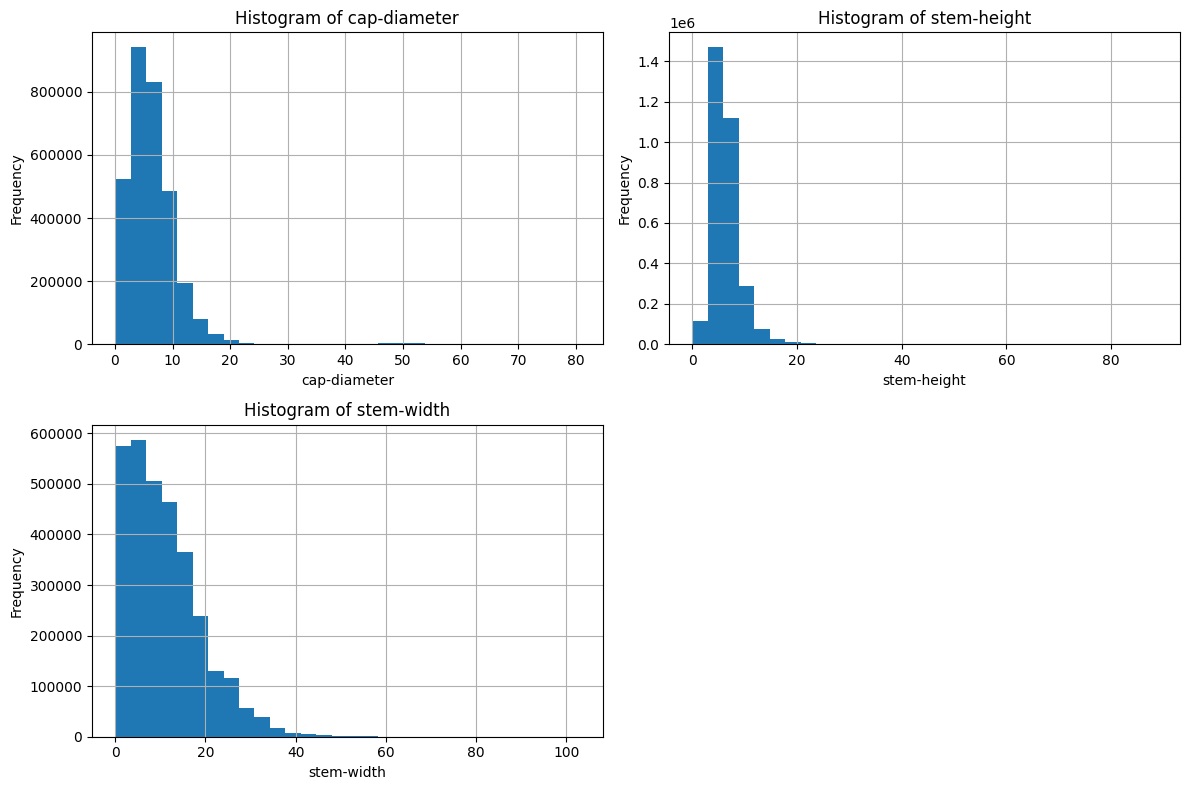

In [12]:
columns_to_plot = ['cap-diameter', 'stem-height', 'stem-width']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    train_data[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# 필요한 컬럼과 클래스를 지정하여 산점도 그리기
sns.pairplot(data=train_data, vars=['cap-diameter', 'stem-height', 'stem-width'], hue='class', palette='coolwarm')
plt.suptitle('Pairplot', y=1.02)
plt.show()

## 독버섯은 cap-diameter와 stem-width의 값이 작은 경향 발견

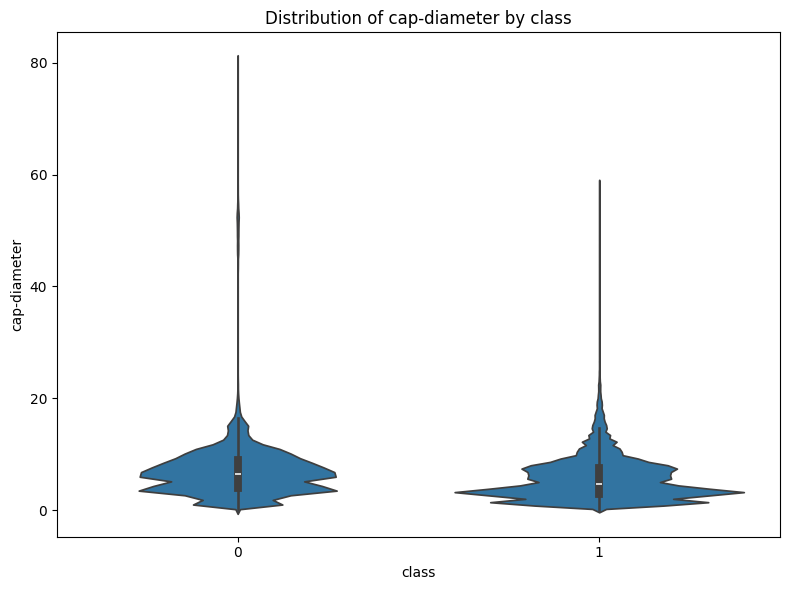

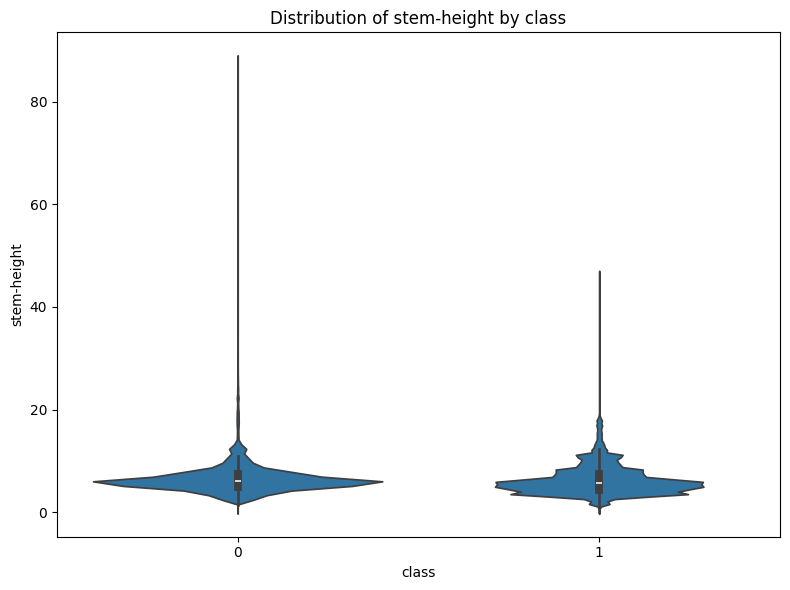

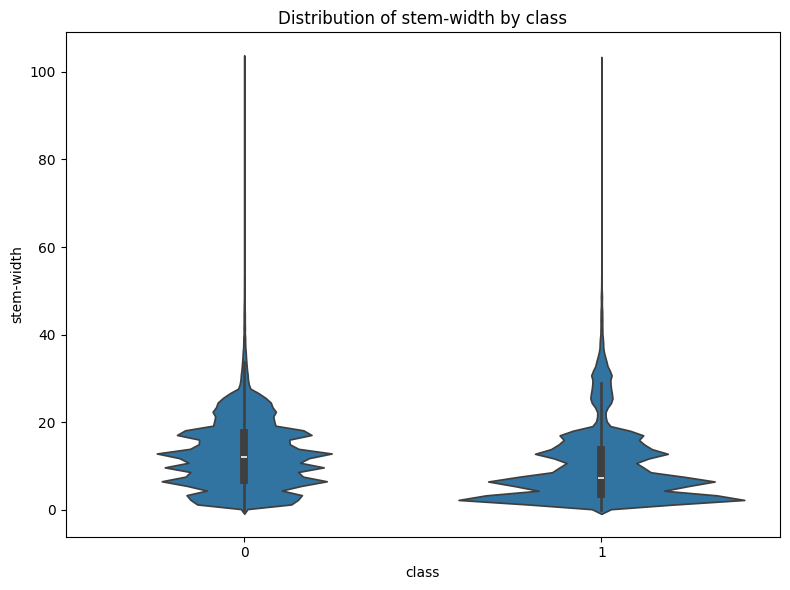

In [ ]:
for column in ['cap-diameter', 'stem-height', 'stem-width']:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train_data, x='class', y=column)
    plt.title(f'Distribution of {column} by class')

    plt.tight_layout()
    plt.show()

## 꼬리보니까 이상치가 존재한다 = isolation processing

In [9]:
from scipy import stats

# 대상 컬럼
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

# train_data의 숫자형 컬럼에 대해 Z-점수 계산
z_scores = stats.zscore(train_data[numerical_columns])

# Z-점수의 요약 통계 및 소수점 세 자리까지 반올림
z_scores_summary = pd.DataFrame(z_scores, columns=numerical_columns).describe().round(3)
z_scores_summary

,cap-diameter,stem-height,stem-width
count,3116468.000,3116468.000,3116468.000
mean,-0.000,-0.000,0.000
std,1.000,1.000,1.000
min,-1.348,-2.351,-1.378
25%,-0.642,-0.622,-0.764
50%,-0.120,-0.174,-0.186
75%,0.414,0.393,0.553
max,15.964,30.510,11.333


In [ ]:
# Isolation Forest는 데이터의 분포와 밀집도를 기반으로 이상치를 비선형적으로 탐지
# Z분포를 기준으로 제거하지 않고 이 방법 쓰자

from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 생성
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Isolation Forest를 전체 데이터에 적용하여 이상치 탐지
outliers = iso_forest.fit_predict(train_data[['cap-diameter', 'stem-height', 'stem-width']])

# 정상으로 분류된 데이터만 선택 (outliers == 1인 행)
train_data = train_data[outliers == 1]

print("Isolation Forest를 적용하여 이상치를 제거한 데이터 크기:", train_data.shape)

Isolation Forest를 적용하여 이상치를 제거한 데이터 크기: (3085306, 16)


## object type_시각화

In [ ]:
# object 타입만 고유치 출력
object_columns = train_data.select_dtypes(include=['object']).columns
print(train_data[object_columns].nunique())

cap-shape               5
cap-surface             8
cap-color               7
does-bruise-or-bleed    3
gill-attachment         7
gill-spacing            4
gill-color              7
stem-color              4
has-ring                3
ring-type               2
habitat                 4
dtype: int64


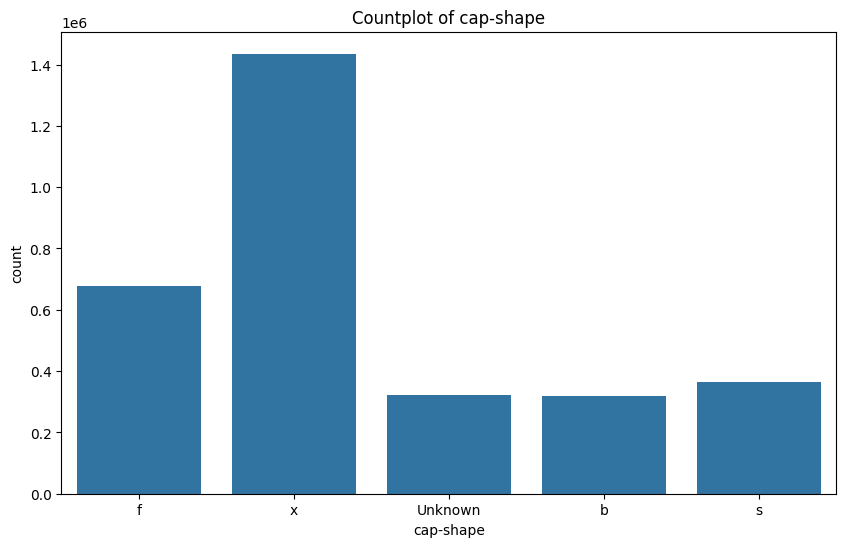

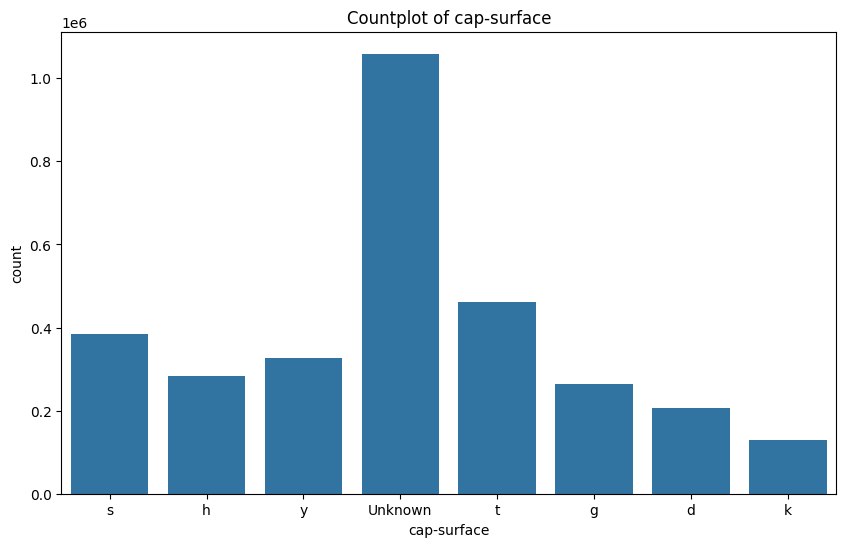

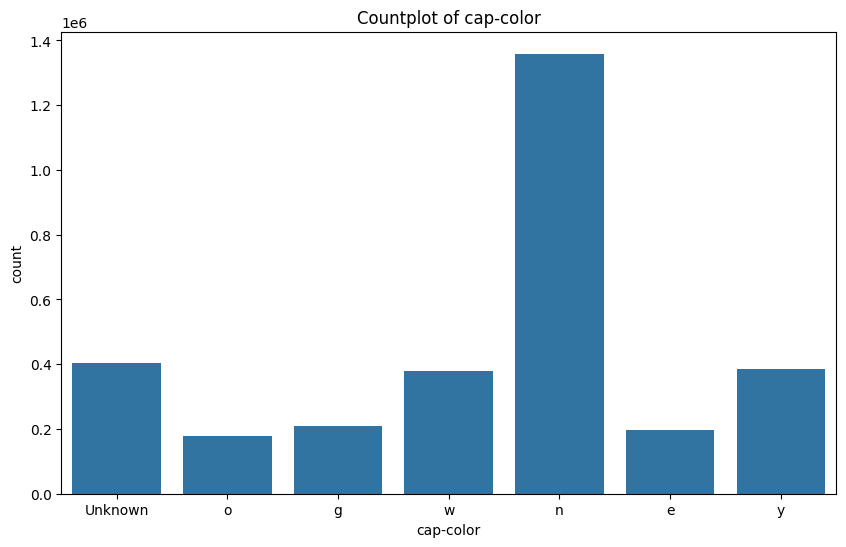

In [132]:
# 시각화할 컬럼
column_name = 'cap-shape'  

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'cap-surface'   

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'cap-color' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

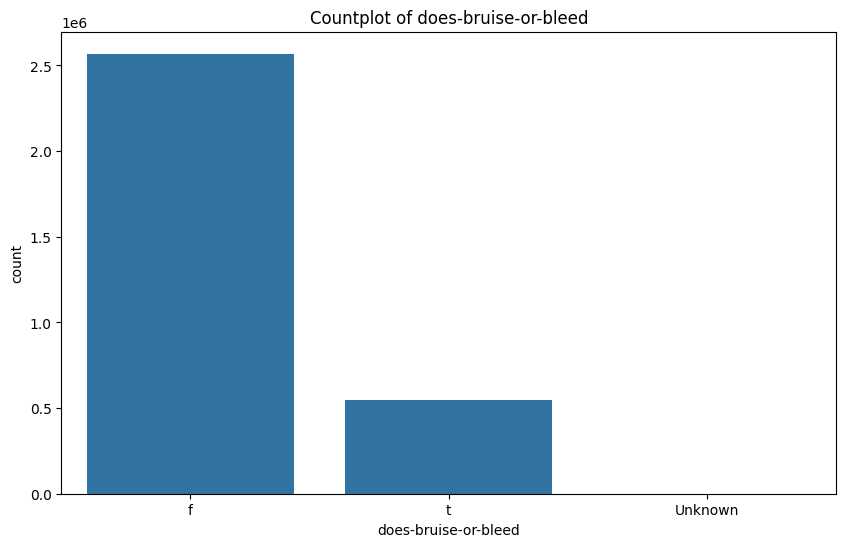

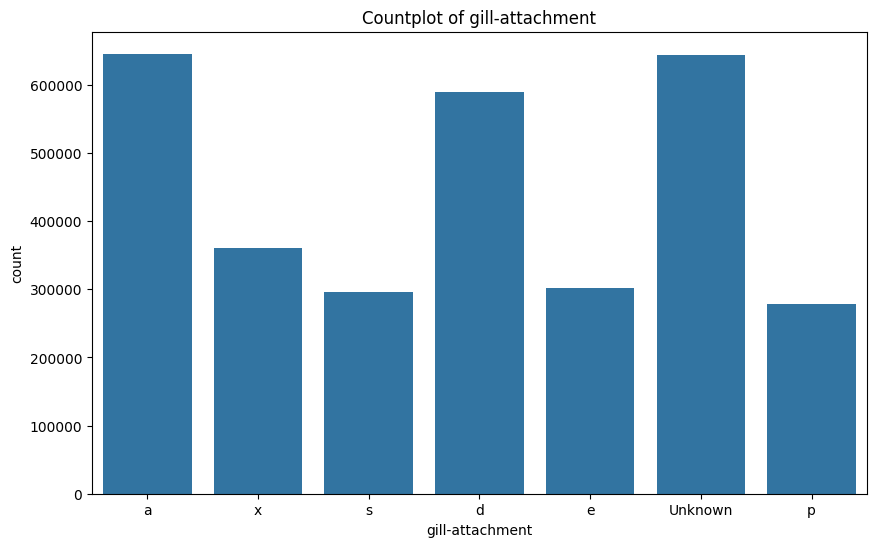

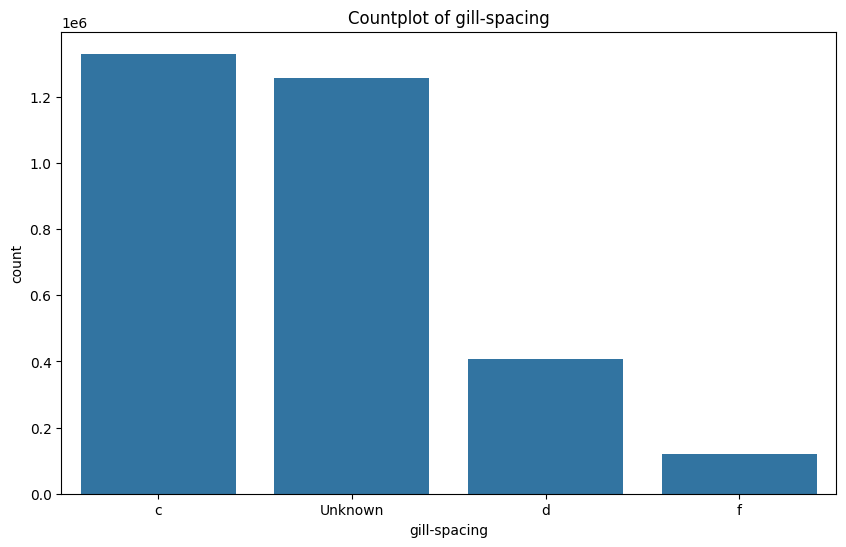

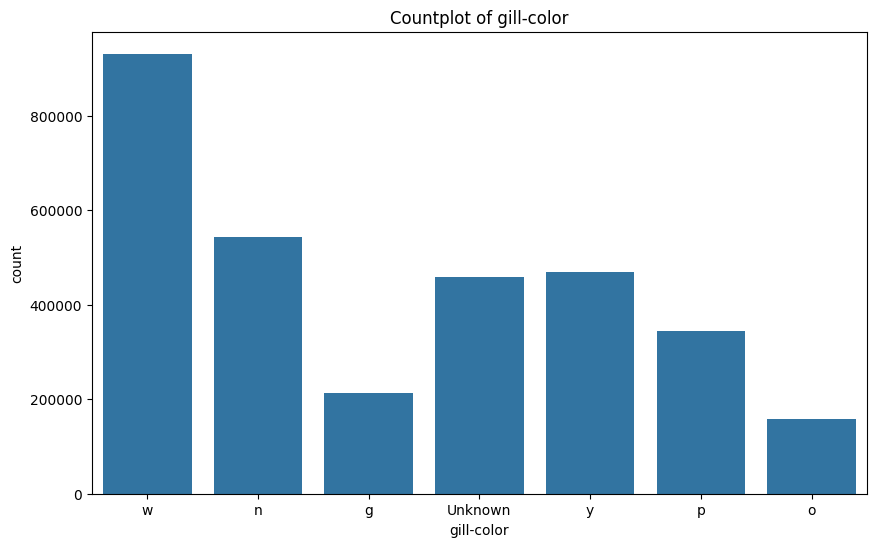

In [15]:
# 시각화할 컬럼
column_name = 'does-bruise-or-bleed' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'gill-attachment' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'gill-spacing' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'gill-color' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()         

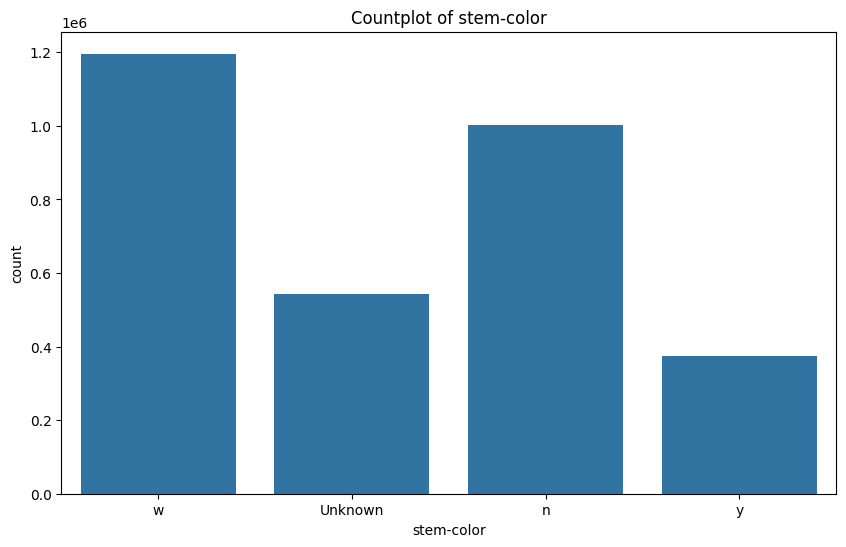

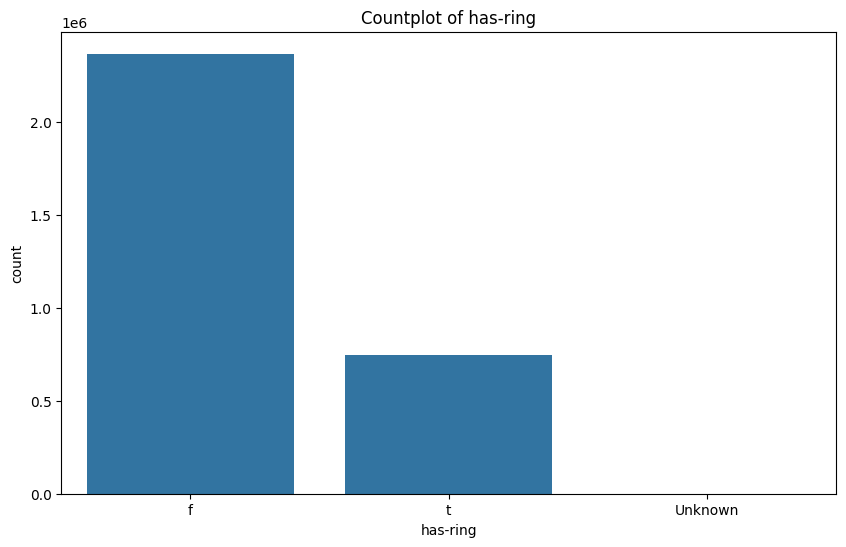

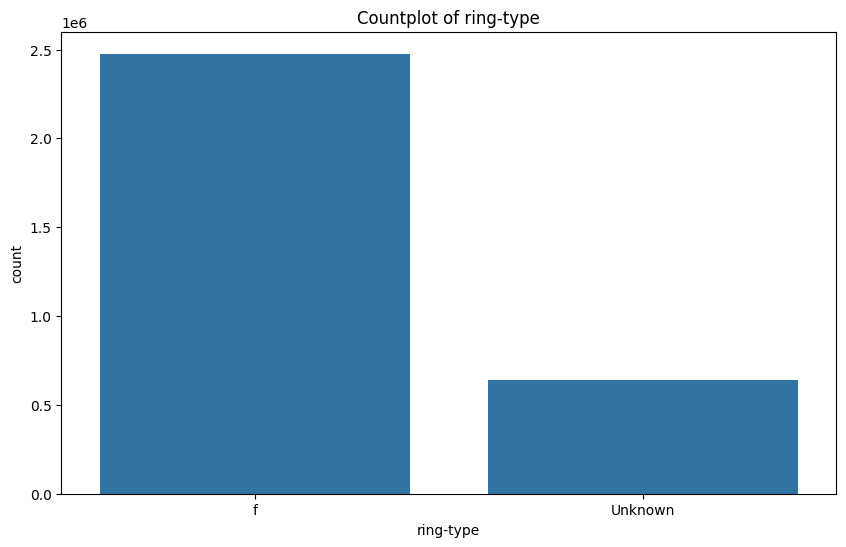

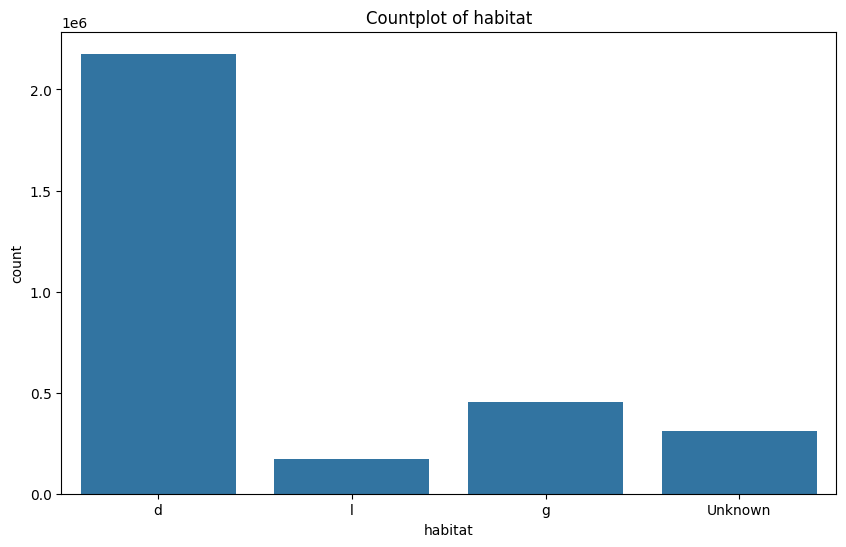

In [16]:
# 시각화할 컬럼
column_name = 'stem-color' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'has-ring'

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'ring-type' 

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

# 시각화할 컬럼
column_name = 'habitat'

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x=column_name)
plt.title(f'Countplot of {column_name}')
plt.show()

<Figure size 800x600 with 0 Axes>

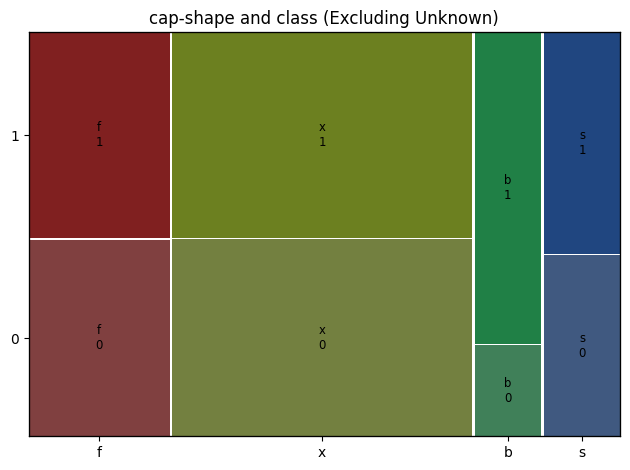

<Figure size 800x600 with 0 Axes>

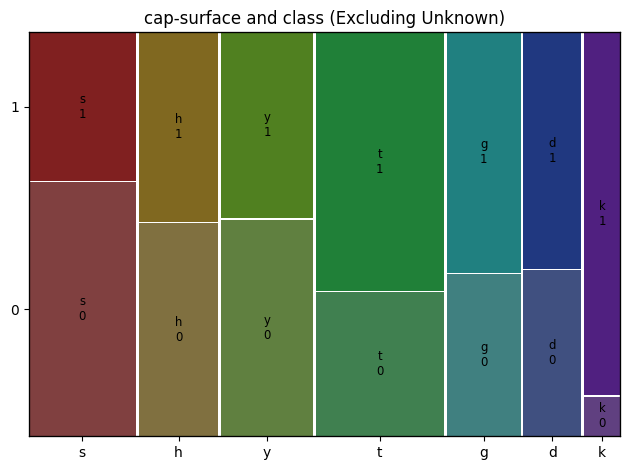

<Figure size 800x600 with 0 Axes>

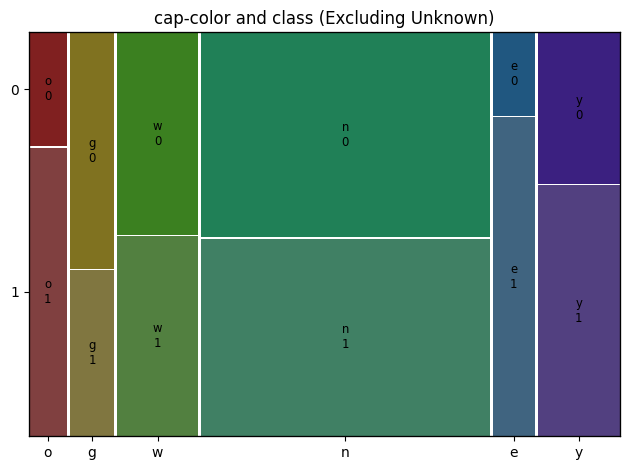

<Figure size 800x600 with 0 Axes>

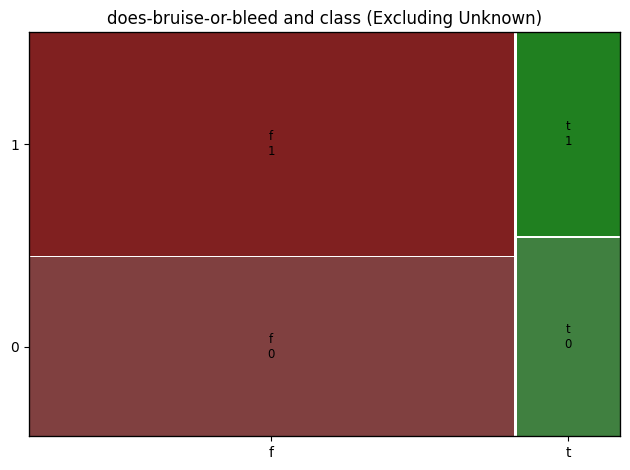

<Figure size 800x600 with 0 Axes>

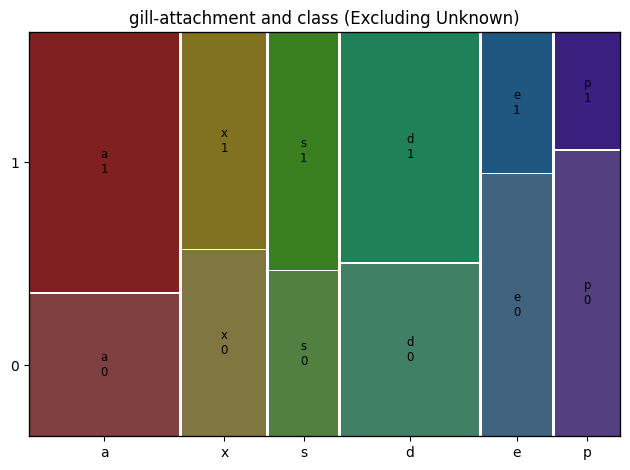

<Figure size 800x600 with 0 Axes>

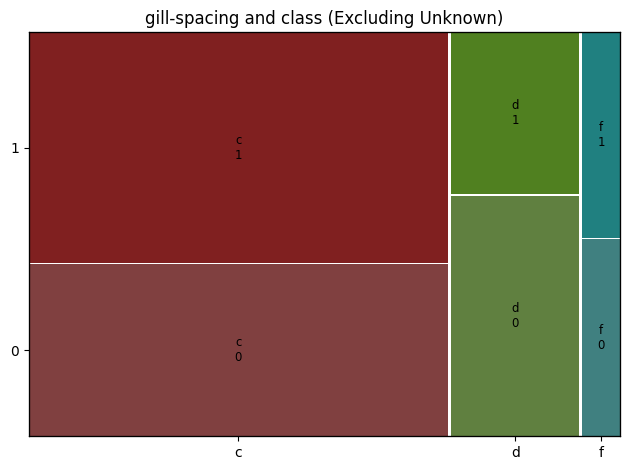

<Figure size 800x600 with 0 Axes>

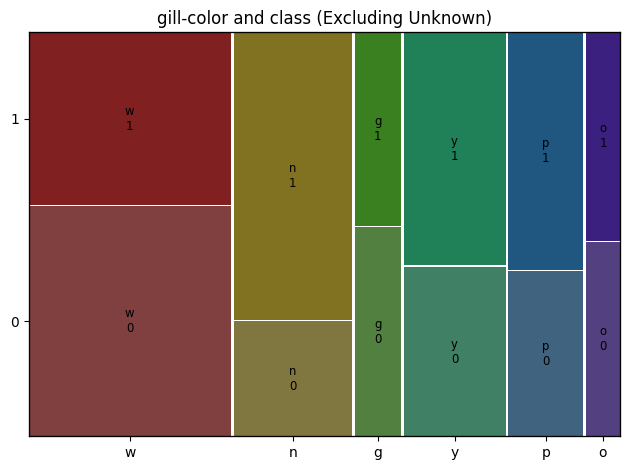

<Figure size 800x600 with 0 Axes>

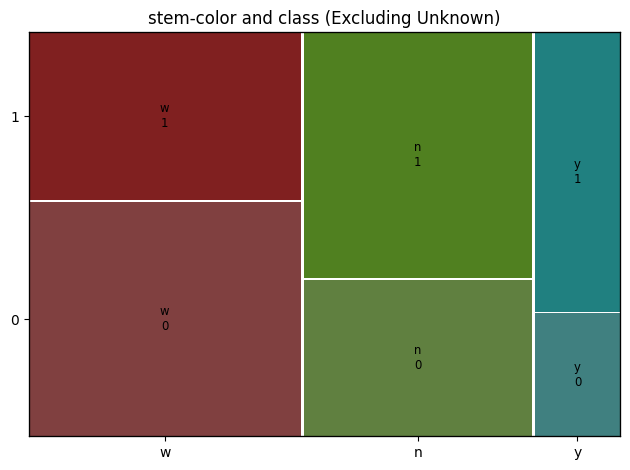

<Figure size 800x600 with 0 Axes>

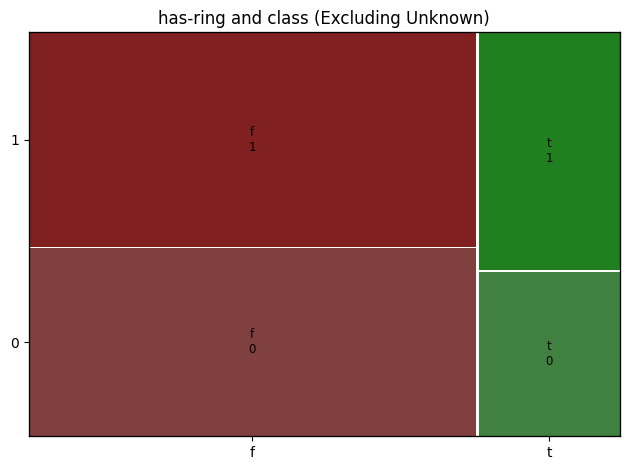

<Figure size 800x600 with 0 Axes>

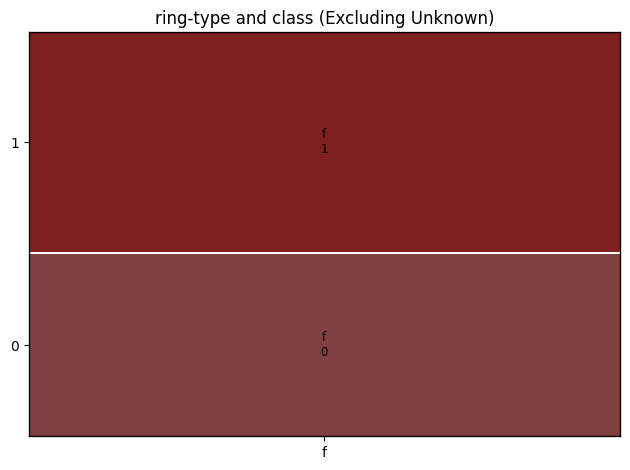

<Figure size 800x600 with 0 Axes>

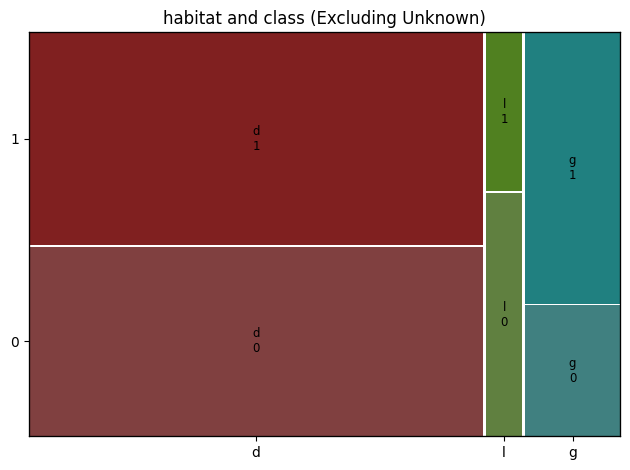

In [ ]:
# class 별로 object type column 시각화
from statsmodels.graphics.mosaicplot import mosaic

# object 타입 컬럼들을 필터링하여 새로운 변수에 저장
categorical_columns = train_data.select_dtypes(include=['object']).columns

# 각 범주형 컬럼과 class 간의 관계를 모자이크 플롯으로 시각화
for column in categorical_columns:
    # "Unknown" 값을 제외한 데이터만 필터링
    filtered_data = train_data[train_data[column] != 'Unknown']

    plt.figure(figsize=(8, 6))
    mosaic(filtered_data, [column, 'class'])
    plt.title(f'{column} and class (Excluding Unknown)')
    plt.tight_layout()
    plt.show()

## 독버섯은 봄, 가을에 더 많이 발견되더라

In [11]:
# 새로운 이진 변수 'is_spring_or_fall' 생성
train_data['is_spring_or_fall'] = train_data['season'].apply(lambda x: 1 if x in ['spring', 'fall'] else 0)

# 결과 확인
print(train_data[['season', 'is_spring_or_fall']].head())

   season  is_spring_or_fall
0       0                  0
1       3                  0
2       3                  0
3       2                  0
4       0                  0


## 최종 data 확인

In [12]:
display(train_data.head(20))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,is_spring_or_fall
0,0,8.80,f,s,Unknown,f,a,c,w,4.51,15.39,w,f,f,d,0,0
1,1,4.51,x,h,o,f,a,c,n,4.79,6.48,Unknown,t,Unknown,d,3,0
2,0,6.94,f,s,Unknown,f,x,c,w,6.85,9.93,n,f,f,l,3,0
3,0,3.88,f,y,g,f,s,Unknown,g,4.16,6.53,w,f,f,d,2,0
4,0,5.85,x,Unknown,w,f,d,Unknown,w,3.37,8.36,w,f,f,g,0,0
5,1,4.30,x,t,n,f,s,c,n,5.91,8.20,w,t,Unknown,d,0,0
6,0,9.65,Unknown,y,w,f,e,c,Unknown,19.07,12.69,w,t,Unknown,g,3,0
7,1,4.55,x,Unknown,e,f,a,Unknown,y,8.31,9.77,y,t,Unknown,d,0,0
8,1,7.36,f,h,e,f,x,d,w,5.77,17.13,w,f,f,d,0,0
9,0,6.45,x,t,n,f,a,d,w,7.13,12.77,Unknown,f,f,d,0,0


In [13]:
# 타입
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3085306 entries, 0 to 3116944
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                int32  
 16  is_spring_or_fall     int64  
dtypes: float64(3), int32(1), int64(2), object(11)
memory usage: 411.9+ MB


In [14]:
# 고유값
unique_counts = train_data.nunique()
print(unique_counts)

class                      2
cap-diameter            2271
cap-shape                  5
cap-surface                8
cap-color                  7
does-bruise-or-bleed       3
gill-attachment            7
gill-spacing               4
gill-color                 7
stem-height             2401
stem-width              5124
stem-color                 4
has-ring                   3
ring-type                  2
habitat                    4
season                     4
is_spring_or_fall          1
dtype: int64


In [15]:
# null 값
null_columns = train_data.isnull().sum()

# null 값이 있는 컬럼만 필터링
null_columns_with_data = null_columns[null_columns > 0] 

# null 값이 있는 컬럼과 해당 null 값의 개수를 출력
print("Null 값이 있는 컬럼과 그 개수:")
print(null_columns_with_data)

# null 값이 있는 컬럼의 수를 출력
print(f"\nNull 값이 있는 컬럼의 수: {len(null_columns_with_data)}")

Null 값이 있는 컬럼과 그 개수:
Series([], dtype: int64)

Null 값이 있는 컬럼의 수: 0


## 파일 저장

In [19]:
train_data.to_csv(r"C:\Users\njh45\OneDrive\바탕 화면\Kuggle_11기\Project\train_cleaned.csv")

print('저장 완료')

저장 완료
